### Aidan Keating - Project 2 (Incorrect)

In [1]:
# Connect to database 

import mysql.connector as mariadb

def create_conn():
    conn = mariadb.connect(
        host="128.198.162.191",
        user="infscompany",
        password="yeadata",
        database="company"
    )
    return conn

In [2]:
from sqlalchemy import create_engine, text 
import pandas as pd

conn = create_conn()

# create a connection to the database

engine = create_engine("mysql+mysqlconnector://", creator=lambda: conn)

# Set a custom display format for floats

pd.options.display.float_format = '{:,.2f}'.format

# Select records

# Selects ExpenseDate, SalesDate, Weekly_Sales, and Expense_Allocation and joins them on Dept 55

sql_query2 = "select sales.Dept AS Department, sales.Weekly_Sales, expenses_month_dept.Expense_Allocation AS Expense,\
    expenses_month_dept.ExpenseDate, sales.SalesDate from sales inner join expenses_month_dept on sales.Dept = expenses_month_dept.Dept where sales.Dept = 55;"

sql = text(sql_query2)

# Execute the query and return the results into a Pandas dataframe

sales_df = pd.read_sql_query(sql, engine)

# Print the results

print(sales_df)

         Department  Weekly_Sales    Expense ExpenseDate   SalesDate
0             55.00     36,485.07 226,376.58  2019-07-31  2019-02-05
1             55.00     36,485.07 218,240.50  2019-08-31  2019-02-05
2             55.00     36,485.07 232,932.59  2019-09-30  2019-02-05
3             55.00     36,485.07 168,324.30  2020-11-30  2019-02-05
4             55.00     36,485.07 172,342.55  2020-12-31  2019-02-05
...             ...           ...        ...         ...         ...
6469919       55.00          0.00  79,914.26  2021-04-30  2021-06-30
6469920       55.00          0.00  79,715.15  2021-05-31  2021-06-30
6469921       55.00          0.00  81,557.25  2021-06-30  2021-06-30
6469922       55.00          0.00  37,066.83  2021-04-30  2021-06-30
6469923       55.00          0.00       0.00  2021-05-31  2021-06-30

[6469924 rows x 5 columns]


In [3]:
# Convert dates to datetime

sales_df['SalesDate'] = pd.to_datetime(sales_df['SalesDate'])
sales_df['ExpenseDate'] = pd.to_datetime(sales_df['ExpenseDate'])

# Extract YearMonth for grouping

sales_df['YearMonth'] = sales_df['SalesDate'].dt.to_period('M')

# Aggregate weekly sales by month

monthly_sales = sales_df.groupby('YearMonth')['Weekly_Sales'].sum().reset_index()
monthly_sales.rename(columns={'Weekly_Sales': 'Monthly_Sales'}, inplace=True)

# Aggregate expenses by month

sales_df['ExpenseYearMonth'] = sales_df['ExpenseDate'].dt.to_period('M')
monthly_expenses = sales_df.groupby('ExpenseYearMonth')['Expense'].sum().reset_index()
monthly_expenses.rename(columns={'ExpenseYearMonth': 'YearMonth'}, inplace=True)

# Merge sales and expenses data

df_profit = pd.merge(monthly_sales, monthly_expenses, on='YearMonth')

# Calculate profit

df_profit['Profit'] = df_profit['Monthly_Sales'] - df_profit['Expense']

print(df_profit)

   YearMonth     Monthly_Sales            Expense              Profit
0    2019-02  5,200,028,701.33  80,729,944,679.28  -75,529,915,977.95
1    2019-03  4,326,153,048.57 103,099,642,655.90  -98,773,489,607.33
2    2019-04  4,497,734,393.21 103,335,736,821.02  -98,838,002,427.81
3    2019-05  3,163,587,554.74 103,549,143,697.28 -100,385,556,142.54
4    2019-06  3,392,037,410.14  99,146,404,555.42  -95,754,367,145.28
5    2019-07  3,986,176,287.51  80,473,360,671.08  -76,487,184,383.57
6    2019-08  2,978,933,465.76  74,857,576,865.58  -71,878,643,399.82
7    2019-09  2,973,158,549.77  76,898,002,395.48  -73,924,843,845.71
8    2019-10  3,884,232,287.33  77,200,787,952.62  -73,316,555,665.29
9    2019-11  7,105,010,257.79  77,394,671,808.44  -70,289,661,550.65
10   2019-12 12,540,161,486.01  77,637,307,978.26  -65,097,146,492.25
11   2020-01  3,082,888,218.42  70,636,922,637.74  -67,554,034,419.32
12   2020-02  4,066,309,207.85  51,628,835,472.96  -47,562,526,265.11
13   2020-03  3,730,

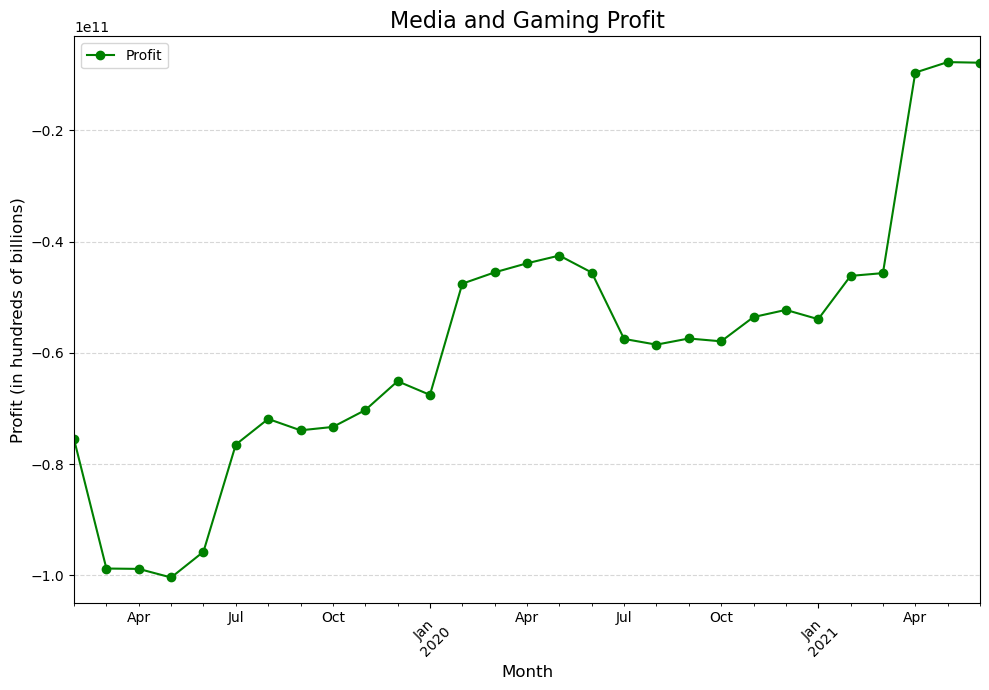

In [6]:
import matplotlib.pyplot as plt

final_sales_df = pd.DataFrame(df_profit)

# Group by SalesMonth and calculate total profit

monthly_profit = df_profit.groupby('YearMonth')['Profit'].sum()

# Plot the data and format the chart

plt.figure(figsize=(10, 7))

monthly_profit.plot(kind='line', marker='o', color='g', linestyle='-', label='Profit')

# Format the line chart and pass the 'X' and 'Y' information and labels

plt.title('Media and Gaming Profit', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Profit (in hundreds of billions)', fontsize=12)

plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

# Show the plot

plt.show()

In [7]:
# I held onto each iteration of my query in case I messed one up beyond repair and have to revert to the previous

# Selects Weekly_Sales from the Sales Table from Department 5 (Gaming)

# sql_query2 = "select Dept AS Department, Weekly_Sales from sales where Dept = 5;"

# Selects  Weekly_Sales, Expense_Allocation, and joins them on Dept 5 column

# sql_query2 = "select sales.Dept AS Department, sales.Weekly_Sales, expenses_month_dept.Expense_Allocation AS Expense from sales\
#  inner join expenses_month_dept on sales.Dept = expenses_month_dept.Dept where sales.Dept = 55;"

# Formats SalesDate output and creates a Profit column subtracting monthly expenses from weekly sales

# sql_query2 = "select sales.Dept AS Department, format(sales.SalesDate, 'yyyy-MM') AS SalesMonth, sum(sales.Weekly_Sales) AS TotalWeeklySales, \
#    expenses_month_dept.Expense_Allocation AS MonthlyExpense, expenses_month_dept.ExpenseDate, \
#    (sum(sales.Weekly_Sales) - expenses_month_dept.Expense_Allocation) AS Profit from sales inner join expenses_month_dept \
#    on sales.Dept = expenses_month_dept.Dept where sales.Dept = 55 group by sales.Dept, format(sales.SalesDate, 'yyyy-mm'), \
#    expenses_month_dept.Expense_allocation, expenses_month_dept.ExpenseDate;"